# HSE 2021: Mathematical Methods for Data Analysis

## Homework 4

**Warning 1**: You have 2 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells


### Contents

#### Decision Trees - 7 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (2 points)
* [Task 4](#task4) (0.5 points)
* [Task 5](#task5) (0.5 points)
* [Task 6](#task6) (2 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (0.5 points)

#### Ensembles - 3 points
* [Task 1](#task2_1) (1 point)
* [Task 2](#task2_2) (0.7 points)
* [Task 3](#task2_3) (0.5 points)
* [Task 4](#task2_4) (0.7 points)
* [Task 5](#task2_5) (0.1 points)

## +0.2 к домашке от Darky Dash

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error


plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

# Part 1. Decision Tree Regressor

In this task you will be implementing decision tree for the regression by hand.

### Task 1 <a id="task1"></a> (0.5 points)

Here you should implement the function `H()` which calculates impurity criterion. We will be training regression tree, and will take mean absolute deviation as impurity criterion.

* You cannot use loops
* If `y` is empty, the function should return 0

In [ ]:
"""
Calculate impurity criterion
Parameters
----------
y : np.array
    array of objects target values in the node
Returns
-------
H(R) : float
    Impurity in the node (measuread by variance)
"""

'\nCalculate impurity criterion\nParameters\n----------\ny : np.array\n    array of objects target values in the node\nReturns\n-------\nH(R) : float\n    Impurity in the node (measuread by variance)\n'

In [ ]:
def H(y):
    # YOUR CODE HERE
    # в случае 0 ничего не нужно считать, будет 0
    # иначе считаем как нас просят
    return 0.0 if len(y) == 0 else mean_absolute_error(y, np.full(len(y), y.mean()))

In [ ]:
# Test the function
assert np.allclose(H(np.array([4, 2, 2, 2])), 0.75)
assert np.allclose(H(np.array([])), 0.0)

### Task 2 <a id="task2"></a>  (0.5 points)

To find the best split in the node we need to calculate the cost function. Denote:
- `R` all the object in the node
- `j` index of the feature selected for the split
- `t` threshold
- `R_l` and `R_r` objects in the left and right child nodes correspondingly

We get the following cost function:

$$
Q(R, j, t) =\frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R|}H(R_r) \to \min_{j, t},
$$

Implement the function `Q`, which should calculate value of the cost function for a given feature and threshold.

In [ ]:
"""
Calculate cost function
Parameters
----------
X : ndarray
    array of objects in the node
y : ndarray
    array of target values in the node
j : int
    feature index (column in X)
t : float
    threshold
Returns
-------
Q : float
    Value of the cost function
"""

'\nCalculate cost function\nParameters\n----------\nX : ndarray\n    array of objects in the node\ny : ndarray\n    array of target values in the node\nj : int\n    feature index (column in X)\nt : float\n    threshold\nReturns\n-------\nQ : float\n    Value of the cost function\n'

In [ ]:
def Q(X, y, j, t):
    # YOUR CODE HERE
    # условие логическое для получения детей левого и правого
    val_lind = X[:, j] <= t
    val_rind = ~val_lind
    # подсчет левых и правых частей производим
    limp = H(y[val_lind])
    rimp = H(y[val_rind])
    Q = (len(y[val_lind]) / len(y)) * limp + (len(y[val_rind]) / len(y)) * rimp
    return Q

### Task 3 <a id="task3"></a>  (2 points)

Now, let's implement `MyDecisionTreeRegressor` class. More specifically, you need to implement the following methods:

- `best_split`
- `grow_tree`
- `get_prediction`

Also, please add `min_samples_leaf` parameter to your class

Read docstrings for more details. Do not forget to use function `Q` implemented above, when finding the `best_split`

In [ ]:
"""
Class for a decision tree node.

Parameters
----------
right : Node() or None
    Right child
right : Node() or None
    Left child
threshold: float

column: int

depth: int

prediction: float
    prediction of the target value in the node
    (average values calculated on a train dataset)
is_terminal:bool
    indicates whether it is a terminal node (leaf) or not
"""

'\nClass for a decision tree node.\n\nParameters\n----------\nright : Node() or None\n    Right child\nright : Node() or None\n    Left child\nthreshold: float\n\ncolumn: int\n\ndepth: int\n\nprediction: float\n    prediction of the target value in the node\n    (average values calculated on a train dataset)\nis_terminal:bool\n    indicates whether it is a terminal node (leaf) or not\n'

In [ ]:
class Node(object):
    def __init__(self):
        self.right = None
        self.left = None
        self.threshold = None
        self.column = None
        self.depth = None
        self.is_terminal = False
        self.prediction = None
        self.n_outputs = None
        self.value = None

    def __repr__(self):
        if self.is_terminal:
            node_desc = 'Pred: {:.2f}'.format(self.prediction)
        else:
            node_desc = 'Col {}, t {:.2f}, Pred: {:.2f}'. \
            format(self.column, self.threshold, self.prediction)
        return node_desc

In [ ]:
"""
Class for a Decision Tree Regressor.

Parameters
----------
max_depth : int
    Max depth of a decision tree.
min_samples_split : int
    Minimal number of samples (objects) in a node to make a split.
"""

"""
Find the best split in terms of Q of data in a given decision tree node.
Try all features and thresholds.

Parameters
----------
X : ndarray, shape (n_objects, n_features)
        Objects in the parent node
y : ndarray, shape (n_objects, )
        1D array with the object labels.

Returns
-------
best_split_column : int
        Index of the best split column
best_threshold : float
        The best split condition.
X_left : ndarray, shape (n_objects_l, n_features)
        Objects in the left child
y_left : ndarray, shape (n_objects_l, )
        Objects labels in the left child.
X_right : ndarray, shape (n_objects_r, n_features)
        Objects in the right child
y_right : ndarray, shape (n_objects_r, )
        Objects labels in the right child.
"""

"""
Check terminality conditions based on `max_depth`,
`min_samples_split` parameters for a given node.

Parameters
----------
    node : Node,

    y : ndarray, shape (n_objects, )
        Object labels.

Returns
-------
    Is_termial : bool
        If True, node is terminal
"""

"""
Reccurently grow the tree from the `node` using a `X` and `y` as a dataset:
- check terminality conditions
- find best split if node is not terminal
- add child nodes to the node
- call the function recursively for the added child nodes

Parameters
----------
node : Node() object
            Current node of the decision tree.
X : ndarray, shape (n_objects, n_features)
            Objects
y : ndarray, shape (n_objects)
            Labels
"""

"""
Fit the Decision Tree Regressor.

Parameters
----------
X : ndarray, shape (n_samples, n_features)
            The input samples.
y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
            The target values.
Returns
-------
self : object
            Returns self.
"""

"""
Get prediction for an object `x`
- Return prediction of the `node` if it is terminal
- Otherwise, recursively call the function to get
predictions of the proper child

Parameters
----------
node : Node() object
            Current node of the decision tree.
x : ndarray, shape (n_features,)
            Array of feature values of one object.
Returns
-------
y_pred : float
            Prediction for an object x
"""

"""
Get prediction for each object in X

Parameters
----------
X : ndarray, shape (n_samples, n_features)
            The input samples.
Returns
-------
y : ndarray, shape (n_samples,)
            Returns predictions.
"""

'\nGet prediction for each object in X\n\nParameters\n----------\nX : ndarray, shape (n_samples, n_features)\n            The input samples.\nReturns\n-------\ny : ndarray, shape (n_samples,)\n            Returns predictions.\n'

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MyDecisionTreeRegressor(RegressorMixin, BaseEstimator):

    def __init__(self, max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion='entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion

    def best_split(self, X, y):
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        # without splitting
        best_cost = H(y)
        kol_feat = X.shape[1]


        # YOUR CODE HERE
        # будем решать проблему поиска лучшего с помощью цикла-исследования
        for iter_featind in range(kol_feat):
            for iter_threshold in np.unique(X[:, iter_featind]):
                iter_threshold += 1e-6
                # воспользуемся функцией из предыдущего номера
                weight_pr_cur = Q(X, y, iter_featind, iter_threshold)
                # случай самого начала прохода и потом в зав-ти от стоимости-веса
                if best_split_column == None:
                    best_cost = weight_pr_cur
                    best_threshold = iter_threshold
                    best_split_column = iter_featind
                elif weight_pr_cur <= best_cost:
                    best_cost = weight_pr_cur
                    best_threshold = iter_threshold
                    best_split_column = iter_featind

        # по сути идея из нашего предыдущего номера, но только чуть-чуть видоизм
        val_indl = X[:, best_split_column] <= best_threshold
        val_indr = ~val_indl
        X_right = X[val_indr]
        y_right = y[val_indr]
        X_left = X[val_indl]
        y_left = y[val_indl]

        # теперь наконец-то добились нашей цели
        return best_split_column, best_threshold, X_left, y_left, X_right, y_right

    def is_terminal(self, node, y):
        if node.depth > self.max_depth:
            return True
        if len(y) < self.min_samples_split:
            return True
        return False

    def grow_tree(self, node, X, y):
        if self.is_terminal(node, y):
            node.is_terminal = True
            return
        # YOUR CODE HERE
        best_split_column, best_threshold, X_left, y_left, X_right, y_right = self.best_split(X, y)

        # пропишем случаи выхода из нашей рекурсии иначе будет капец
        # catoverflow даже не поможет(отсылка на игру while True: learn())

        if self.min_samples_leaf > len(y_right):
            node.is_terminal = True
            return
        if self.min_samples_leaf > len(y_left):
            node.is_terminal = True
            return

        # все проверили, теперь правильно переопределить значения
        node.column = best_split_column
        node.threshold = best_threshold
        node.is_terminal = False

        # теперь делаем самих детей листьев
        # люблю начинать с правого с алгосов заведено
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.prediction = np.mean(y_right)
        self.grow_tree(node.right, X_right, y_right)

        # теперь можно и левый листочек сделать
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.prediction = np.mean(y_left)
        self.grow_tree(node.left, X_left, y_left)


    def fit(self, X, y):
        X, y = check_X_y(X, y, accept_sparse=False)
        # без него выходит AssertionError
        # поэтому стоит добавить
        self.n_features_in_ = X.shape[1]
        self.is_fitted_ = True

        # Initialize the tree (root node)
        self.tree_ = Node()
        self.tree_.depth = 1
        self.tree_.prediction = np.mean(y)

        # Grow the tree
        self.grow_tree(self.tree_, X, y)
        return self

    def get_prediction(self, node, x):
        # YOUR CODE HERE
        if node.is_terminal:
            return node.prediction
        # но вообще можно было бы сразу внутри эти return сделать
        # а не прописывать лишнюю y_pred, но я канон менять не стану
        if node.threshold < x[node.column]:
            y_pred = self.get_prediction(node.right, x)
        else:
            y_pred = self.get_prediction(node.left, x)
        return y_pred

    def predict(self, X):
        # Check input and that `fit` had been called
        X = check_array(X, accept_sparse=False)
        check_is_fitted(self, 'is_fitted_')

        # Get predictions
        y_predicted = []
        for x in X:
            y_curr = self.get_prediction(self.tree_, x)
            y_predicted.append(y_curr)
        return np.array(y_predicted)

In [ ]:
# check yourself
from sklearn.utils.estimator_checks import check_estimator

check_estimator(MyDecisionTreeRegressor())

Оно работает!!!! Но около 35 секунд

### Task 4 <a id="task4"></a>  (0.5 points)

Load boston dataset and split it on the train ($75\%$) and test ($25\%$). Fit Decision Tree of **depth 1, 3, 5** and make the following plots for every case:

- Scatter plot of the traning points (selected for split feature on the x-axis, target variable on the y-axis)
- Fitted model (tree visualization)

Compare `MAE` on train and test. Have trees overfitted?

In [ ]:
# посмотреть что находится внутри и узнать фичи раз ваш бостон удалили
import pickle

# загрузка данных из файла .pkl
with open('boston.pkl', 'rb') as f:
    data = pickle.load(f)

# запись данных в файл .txt
with open('file.txt', 'w') as f:
    f.write(str(data))

In [ ]:
# from sklearn.datasets import load_boston
# колаб подсказал
# YOUR CODE HERE
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# сделали датасет и разделили на X и y
X = pd.DataFrame(data)
y = pd.Series(target)
display(X, y)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
workmodel = MyDecisionTreeRegressor(max_depth=2)
workmodel.fit(X_train, y_train)

sel_treshold = workmodel.tree_.threshold
sel_x = X_train.loc[:, workmodel.tree_.column]

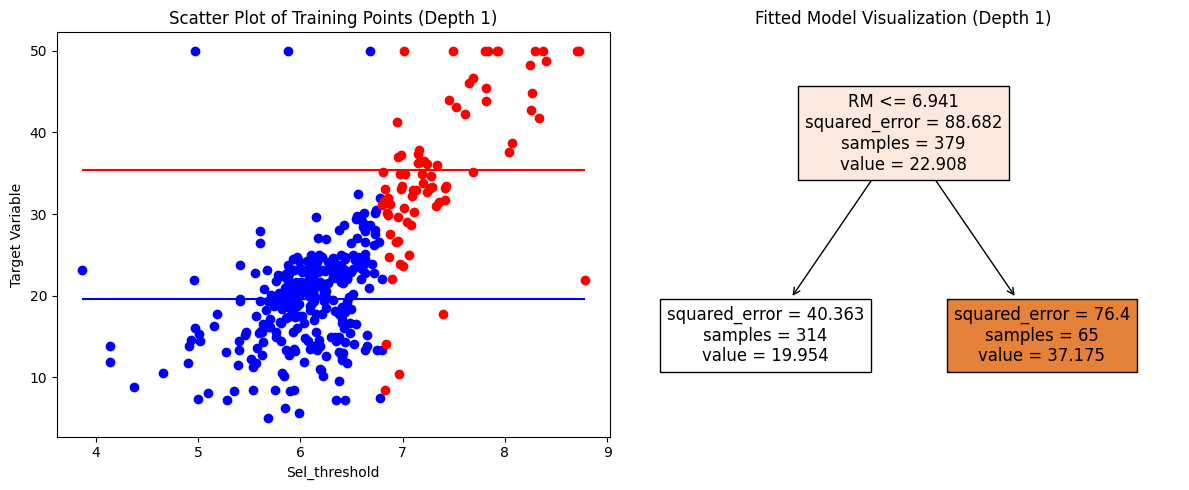

Мое личное написанное MyDecisionTree
Depth 1 - MAE on train: 5.05, MAE on test: 4.84
Написанное уже DecisionTree
Depth 1 - MAE on train: 5.09, MAE on test: 4.87


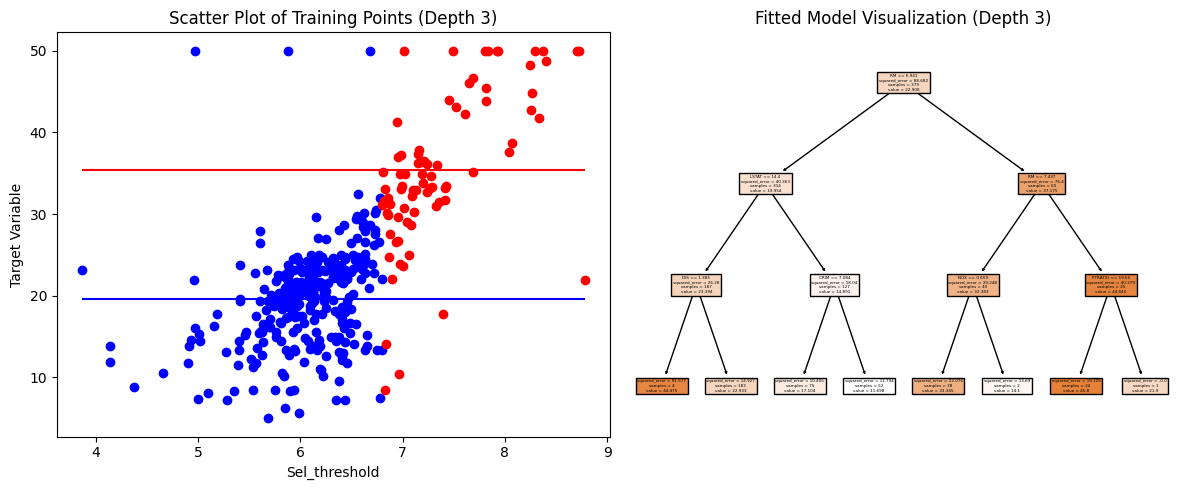

Мое личное написанное MyDecisionTree
Depth 3 - MAE on train: 2.80, MAE on test: 3.23
Написанное уже DecisionTree
Depth 3 - MAE on train: 2.96, MAE on test: 3.08


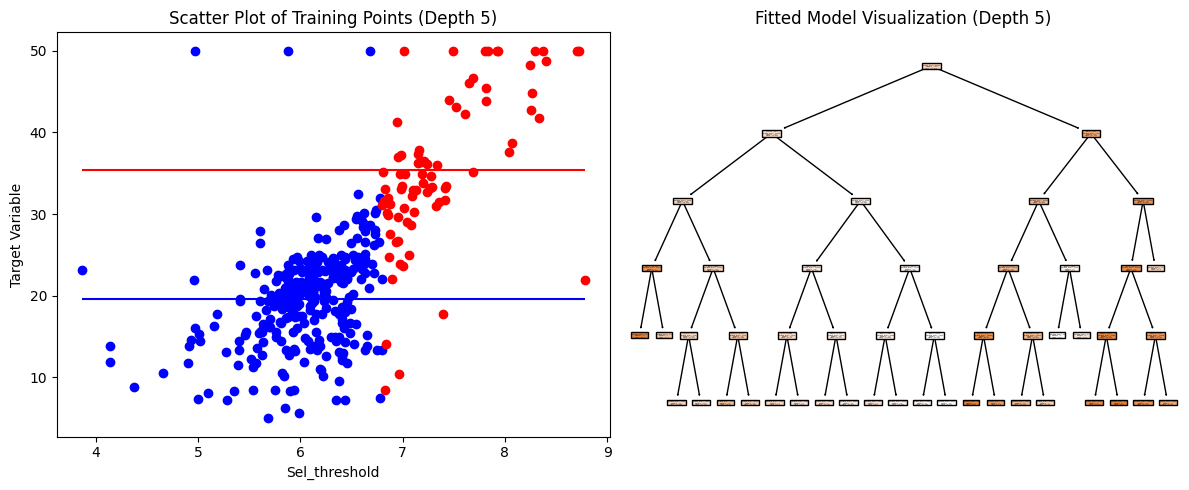

Мое личное написанное MyDecisionTree
Depth 5 - MAE on train: 1.91, MAE on test: 2.97
Написанное уже DecisionTree
Depth 5 - MAE on train: 1.89, MAE on test: 2.36


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_depths = [1, 3, 5]

#  разные высоты дерева
for depth in tree_depths:
    # фитим дерево
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    workmodel = MyDecisionTreeRegressor(max_depth=depth)
    workmodel.fit(X_train, y_train)
    sel_threshold = workmodel.tree_.threshold
    sel_x = X_train.loc[:, workmodel.tree_.column]
    # отображаем на графике
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x=sel_x[sel_x<=sel_threshold], y=y_train[sel_x<=sel_threshold], color="blue", label='Training left Points')
    plt.hlines(y=y_train[sel_x <= sel_threshold].mean(), xmin=sel_x.min(), xmax=sel_x.max(), color='blue', label='left mean')
    plt.scatter(x=sel_x[sel_x>sel_threshold], y=y_train[sel_x>sel_threshold], color="red", label='Training right Points')
    plt.hlines(y=y_train[sel_x > sel_threshold].mean(), xmin=sel_x.min(), xmax=sel_x.max(), color='red', label='right mean')
    plt.xlabel("Sel_threshold")
    plt.ylabel("Target Variable")
    plt.title(f"Scatter Plot of Training Points (Depth {depth})")

    # дерево показываем
    plt.subplot(1, 2, 2)
    plot_tree(model, filled=True, feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
    plt.title(f"Fitted Model Visualization (Depth {depth})")

    plt.tight_layout()
    plt.show()

    # смотрим на MAE
    y_train_pred = workmodel.predict(X_train)
    y_test_pred = workmodel.predict(X_test)
    y_train_pred1 = model.predict(X_train)
    y_test_pred1 = model.predict(X_test)
    # в качестве сравнения привел готовок и свое решение и сравнивад их
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_train1 = mean_absolute_error(y_train, y_train_pred1)
    mae_test1 = mean_absolute_error(y_test, y_test_pred1)

    print("Мое личное написанное MyDecisionTree")
    print(f"Depth {depth} - MAE on train: {mae_train:.2f}, MAE on test: {mae_test:.2f}")
    print("Написанное уже DecisionTree")
    print(f"Depth {depth} - MAE on train: {mae_train1:.2f}, MAE on test: {mae_test1:.2f}")

Исходя из результатов MAE, можно увидеть с каждым увеличением глубины дерева все больше начинает переобучаться каждая модель, а эффект-ть падает
При этом моя реализация работает с небольшим отличием с уже готовой написанной реализацией тут... Получяаеься, есть к чему стремиться?

### Task 5 <a id="task5"></a>  (0.5 points)

Keep working with boston dataset.
- Use `GridSearchCV` to find the best hyperparameters among [`max_depth`, `min_samples_leaf`] on 5-Fold cross-validation
- Train the model with the best set of hyperparameters on the whole train dataset.
- Report `MAE` on test dataset and hyperparameters of the best estimator.

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
# работает оно долго, но работает
workmodel = MyDecisionTreeRegressor(max_depth=8, min_samples_split=2)
classif = GridSearchCV(workmodel, param_grid={'max_depth':[5, 7, 9, 13], 'min_samples_leaf':[1, 4, 10]}, cv=5)
classif.fit(X_train, y_train)

# посмотрим и потренируем на лучших параметрах
display(classif.best_params_)
minitmen = MyDecisionTreeRegressor(**classif.best_params_)
minitmen.fit(X_train, y_train)
display(mean_absolute_error(minitmen.predict(X_test), y_test))

{'max_depth': 9, 'min_samples_leaf': 1}

3.2111035674112167

### Task 6 <a id="task6"></a>  (2 points)

Recall definition of bias and variance:
$$
\text{Bias}^2 = \mathbb{E}_{p(x, y)} \left[  (f(x) - \mathbb{E}_{\mathbb{X}}a_{\mathbb{X}}(x))^2 \right] \\
\text{Variance} = \mathbb{E}_{p(x, y)} \left[  \mathbb{V}_{\mathbb{X}}( a_{\mathbb{X}}(x))  \right]
$$

We wil now use the following algorithm to estimate bias and variance:

1. Use bootsrap to create `n_iter` samples from the original dataset: $X_1, \dots, X_{n_iter}$
2. For each bootstrapped sample define out-of-bag (OOB) sample $Z_1, \dots, Z_{n_iter}$, which contain all the observations, which did not appear in the corresponding boostraped sample
3. Fit the model on $X_i$s and compute predictions on $Z_i$s
4. For a given *object* $n$:
     - bias^2: squared difference between true value $y_n$ and average prediction (average over the algorithms, for which $n$ was in OOB)
     - variance: variance of the prediction (predictions of the algorithms, for which $n$ was in OOB)
5. Average bias^2 and variance over all the points
    
**Implement `get_bias_variance` function, using the algorithm above**

*Note:*  You can only use 1 loop (for bootsrap iterations). All other operations should be vectorized.

In [ ]:
"""
Calculate bias and variance of the `estimator`.
Using a given dataset and bootstrap with `n_iter` samples.

Parameters
----------
x : ndarray, shape (n_samples, n_features)
    The input samples.
y : ndarray, shape (n_samples, n_features)
    The input samples.
n_iter: int
    Number of samples in
Returns
-------
bias2 : float,
    Estiamted squared bias
variance : float,
    Estiamted variance
"""

In [ ]:
def get_bias_variance(estimator, x, y, n_iter):


    # YOUR CODE HERE
    # зададем длину треинровочоного каскада и тистируемого
    len_training = 0.75 * len(y)
    len_training = int(len_training)
    len_testing = len(y) - len_training
    # выполним объединение посследовательности наших массивов
    # при этом в траининг делаем массив заполненный 1
    # а в тестинге делаем массив заполненный нулями
    viborka_training = np.concatenate([np.ones(len_training, dtype=np.bool8), np.zeros(len_testing, dtype=np.bool8)])
    # ля лошара тут len а не просто y
    statave_outlook = np.zeros(len(y))

    # будем хранить наши значения тут
    outloook_testing = []
    outlook_training = []
    final_val = []

    for iter in range(n_iter):
        # сделаем рандомную перетасовку
        np.random.shuffle(viborka_training)
        # теперь треним нашу модель
        estimator.fit(x[viborka_training], y[viborka_training])
        # скопируем и потом копируемое уже зааапендим
        tmp_var = viborka_training.copy()
        outlook_training.append(tmp_var)
        # аналогично но учтем что должен реверс для тестинга
        viborka_testing = ~viborka_training
        tmp_var = viborka_testing.copy()
        outloook_testing.append(tmp_var)
        # переменная резулььтатта предсказания
        vare_res = estimator.predict(x)
        tmp_val = vare_res.copy()
        final_val.append(tmp_val)
        # теперь наши предсказания посмотри
        vare_res[viborka_training] = 0
        statave_outlook += vare_res

    # теперь нужно к нумпай это, чтобы можно было работать с нужными нам фун-ми
    tnp_avpredi = statave_outlook.copy()
    outloook_testing = np.array(outloook_testing)
    outlook_training = np.array(outlook_training)
    final_val = np.array(final_val)

    # ищем теперь variance
    crit_wat = outloook_testing.sum(axis=0)
    tnp_avpredi[crit_wat > 0] /= crit_wat[crit_wat > 0]
    mas_cou = final_val.copy()
    mas_cou = (mas_cou - tnp_avpredi) ** 2

    variance = mas_cou[:, crit_wat > 0].mean()

    # теперь займемся bias**2
    statave_outlook[crit_wat > 0] /= crit_wat[crit_wat > 0]
    statave_outlook[crit_wat > 0] -= y[crit_wat > 0]
    statave_outlook[crit_wat > 0] = statave_outlook[crit_wat > 0] ** 2

    bias2 = statave_outlook[crit_wat > 0].mean()

    # теперь можно вернуть наш биас скуар и варианс

    return bias2, variance




In [ ]:
# Test
estimator = MyDecisionTreeRegressor(max_depth=8, min_samples_split=15)

get_bias_variance(estimator, X_train.values, y_train, 10)

(26.96799724031548, 18.649073571165598)

### Task 7 <a id="task7"></a>  (0.5 points)

Compute bias and variance for the trees with different min_samples_split. Plot how bias and variance change as min_samples_split increases.

Comment on what you observe, how does your result correspond to theory?

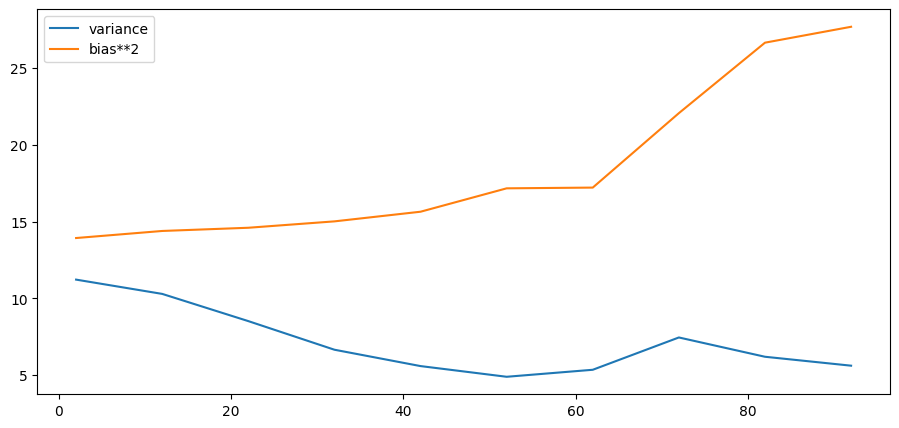

In [ ]:
# YOUR CODE HERE
variance_hran = []
misassp_hran = []
bias2_hran = []

for iter_misassp in range(2, 100, 10):
    # print(iter_misassp)
    workmodel = MyDecisionTreeRegressor(max_depth=8, min_samples_split=iter_misassp)
    bias2, variance = get_bias_variance(workmodel, X, y, 50)
    variance_hran.append(variance)
    misassp_hran.append(iter_misassp)
    bias2_hran.append(bias2)


plt.plot(misassp_hran, variance_hran, label='variance')
plt.plot(misassp_hran, bias2_hran, label='bias**2')
plt.legend()
plt.show()

``` Дисперсия падает, поскольку при увеличении min_samples_split падает чувствительность модели(становится меньше листьев у решающего дерева). Но при этом разбирается меньше случаев, и поэтому отклонение начинает расти.```

### Task 8 <a id="task8"></a>  (0.5 points)

Let's try to reduce variance with bagging. Use `sklearn.ensemble.BaggingRegressor` to get an ensemble and compute its bias and variance.

Answer the following questions:
 - How bagging should affect bias and variance in theory?
 - How bias and variance change (if they change) compared to an individual tree in you experiments?
 - Do your results align with the theory? Why?

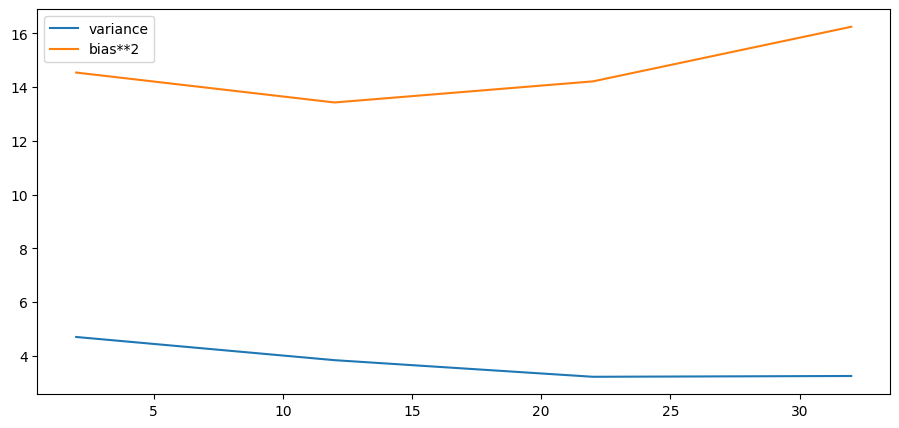

In [ ]:
from sklearn.ensemble import BaggingRegressor

variance_hrani = []
misassp_hrani = []
bias2_hrani = []

for iter_misassp in range(2, 40, 10):
    # print(iter_misassp)
    workmodel_bag = BaggingRegressor(MyDecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=iter_misassp))
    bias2, variance = get_bias_variance(workmodel_bag, X, y, 15)
    variance_hrani.append(variance)
    misassp_hrani.append(iter_misassp)
    bias2_hrani.append(bias2)


plt.plot(misassp_hrani, variance_hrani, label='variance')
plt.plot(misassp_hrani, bias2_hrani, label='bias**2')
plt.legend()
plt.show()


Работает 55 минут, простите

-Дисперсия должна снижаться, а смещение  увеличиваться в теории, поскольку мы берем среднее значение по предсказаниям нескольких обученных на разных поднаборах данных моделей.
Из этого следует, что результат окажется ближе к математическому ожиданию.

-Исходя из резов, происходит именно так(график плохой, ибо это все очень долго работает и поэтому я сильно уменьшил итерации)


# Part 2. More Ensembles

In this part we will be working with [Billionaires Statistics Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset) to solve a classification task.

In [3]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Billionaires Statistics Dataset.csv')

le = LabelEncoder()
y = le.fit_transform(df['selfMade'])
X = df.drop('selfMade', axis=1)
X.head(100)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94,17500,Metals & Mining,Savitri Jindal & family,73.0,India,Hisar,Steel,Metals & Mining,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
96,97,17400,Real Estate,Donald Bren,90.0,United States,Newport Beach,Real estate,Real Estate,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
97,97,17400,Fashion & Retail,"John Menard, Jr.",83.0,United States,Eau Claire,Home improvement stores,Fashion & Retail,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
98,99,17100,Media & Entertainment,Rupert Murdoch & family,92.0,United States,New York,"Newspapers, TV network",Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


### Task 1 <a id="task2_1"></a> (1 point)

Let's start with data preprocessing.

0. Drop columns, which are not usefull (e.g. a lot of missing values). Motivate your choice.
1. Split dataset into train and test
2. You've probably noticed that we have both categorical and numerical columns. Here is what you need to do with them:
    - Categorical: Fill missing values and apply one-hot-encoding (if there are many unique values in a column, you can group them by meaning)
    - Numeric: Fill missing values
    
Use `ColumnTranformer` to define a single transformer for all the columns in the dataset. It takes as input a list of tuples

```
ColumnTransformer([
    ('name1', transform1, column_names1),
    ('name2', transform2, column_names2)
])
```

Pay attention to an argument `remainder='passthrough'`. [Here](https://scikit-learn.org/stable/modules/compose.html#column-transformer) you can find some examples of how to use column transformer.
    
Since we want to apply 2 transformations to categorical feature, it is very convenient to combine them into a `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Choose your favourite way to fill missing values.

*Hint* Categorical column usually have `dtype = 'object'`. This may help to obtain list of categorical and numerical columns on the dataset.

In [5]:
#  ручками отбирал исключил самые бесполезные
#  ведь эти колонки никакой важной информации нам. не дают а скорость работы
#  возрастает
for col in X.columns:
    display(pd.DataFrame(X[col].value_counts().head()))
X = X.drop(labels=['personName', 'lastName', 'firstName', 'date', 'birthDate'], axis=1, errors='ignore')
display(X.head())

,rank
2259,146
2405,135
2133,126
1905,115
2020,113


,finalWorth
1200,146
1100,135
1300,126
1500,115
1400,113


,category
Finance & Investments,372
Manufacturing,324
Technology,314
Fashion & Retail,266
Food & Beverage,212


,age
60.0,88
58.0,83
59.0,82
57.0,75
66.0,74


,country
United States,754
China,523
India,157
Germany,102
United Kingdom,82


,city
New York,99
Beijing,68
Hong Kong,68
Shanghai,64
London,61


,source
Real estate,151
Investments,92
Diversified,91
Pharmaceuticals,85
Software,63


,industries
Finance & Investments,372
Manufacturing,324
Technology,314
Fashion & Retail,266
Food & Beverage,212


,countryOfCitizenship
United States,735
China,491
India,169
Germany,126
Russia,104


,organization
Meta Platforms,4
Gap Inc.,3
Broadcom,2
DJI Technology Co.,2
Twitter,2


,status
D,1223
U,855
E,268
N,150
Split Family Fortune,79


,gender
M,2303
F,337


,title
Investor,44
Founder,34
CEO,29
Chairman and CEO,28
Chairman,25


,state
California,178
New York,128
Florida,94
Texas,70
Illinois,24


,residenceStateRegion
West,248
South,241
Northeast,190
Midwest,67
U.S. Territories,1


,birthYear
1962.0,84
1963.0,83
1955.0,83
1965.0,79
1964.0,77


,birthMonth
1.0,550
10.0,209
9.0,200
3.0,199
8.0,199


,birthDay
1.0,695
15.0,82
10.0,72
12.0,72
19.0,72


,cpi_country
117.24,754
125.08,523
180.44,157
112.85,102
119.62,82


,cpi_change_country
7.5,754
2.9,523
7.7,157
0.4,107
1.4,106


,gdp_country
"$21,427,700,000,000",754
"$19,910,000,000,000",523
"$2,611,000,000,000",157
"$3,845,630,030,824",102
"$2,827,113,184,696",82


,gross_tertiary_education_enrollment
88.2,761
50.6,523
28.1,157
70.2,102
60.0,82


,gross_primary_education_enrollment_country
101.8,754
100.2,530
113.0,157
104.0,102
101.2,82


,life_expectancy_country
78.5,754
77.0,523
69.4,157
80.9,102
81.3,86


,tax_revenue_country_country
9.6,754
9.4,523
11.2,157
11.5,103
25.5,82


,total_tax_rate_country
36.6,761
59.2,523
49.7,159
48.8,102
30.6,82


,population_country
3.282395e+08,754
1.397715e+09,523
1.366418e+09,157
8.313280e+07,102
6.683440e+07,82


,latitude_country
37.090240,754
35.861660,523
20.593684,157
51.165691,102
55.378051,82


,longitude_country
-95.712891,754
104.195397,523
78.962880,157
10.451526,102
-3.435973,82


,rank,finalWorth,category,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Ну тут все понятно, исключаем где слишком много нанов
ибо иначе это работать будет смерть ковра

Да и тем более работать нормально не будет, ведь непонятно что с этим большим количеством нанов делать

Также исключаю то, что никакоц ролезной нагрузки и информации не несет
Тут я избрал такие фичи personName, lastName, firstName, date, birthDate
Также в ходе решения пришлось убрать gdp_country из-за отстутсвия возможности конверта строки в число((

In [6]:
dropping_feat = []
for column in X.columns:
    if X[column].isna().sum() >= 0.5 * X.shape[0]:
      dropping_feat.append(column)
display(dropping_feat)
X = X.drop(dropping_feat, axis=1, errors='ignore')
display(X.head())

['organization', 'title', 'state', 'residenceStateRegion']

,rank,finalWorth,category,age,country,city,source,industries,countryOfCitizenship,status,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,74.0,France,Paris,LVMH,Fashion & Retail,France,U,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,D,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,59.0,United States,Medina,Amazon,Technology,United States,D,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,78.0,United States,Lanai,Oracle,Technology,United States,U,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,D,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [11]:
X = X.drop(labels=['gdp_country'], axis=1, errors='ignore')
for col in X.columns:
    display(pd.DataFrame(X[col].value_counts().head()))

,rank
2259,146
2405,135
2133,126
1905,115
2020,113


,finalWorth
1200,146
1100,135
1300,126
1500,115
1400,113


,category
Finance & Investments,372
Manufacturing,324
Technology,314
Fashion & Retail,266
Food & Beverage,212


,age
60.0,88
58.0,83
59.0,82
57.0,75
66.0,74


,country
United States,754
China,523
India,157
Germany,102
United Kingdom,82


,city
New York,99
Beijing,68
Hong Kong,68
Shanghai,64
London,61


,source
Real estate,151
Investments,92
Diversified,91
Pharmaceuticals,85
Software,63


,industries
Finance & Investments,372
Manufacturing,324
Technology,314
Fashion & Retail,266
Food & Beverage,212


,countryOfCitizenship
United States,735
China,491
India,169
Germany,126
Russia,104


,status
D,1223
U,855
E,268
N,150
Split Family Fortune,79


,gender
M,2303
F,337


,birthYear
1962.0,84
1963.0,83
1955.0,83
1965.0,79
1964.0,77


,birthMonth
1.0,550
10.0,209
9.0,200
3.0,199
8.0,199


,birthDay
1.0,695
15.0,82
10.0,72
12.0,72
19.0,72


,cpi_country
117.24,754
125.08,523
180.44,157
112.85,102
119.62,82


,cpi_change_country
7.5,754
2.9,523
7.7,157
0.4,107
1.4,106


,gross_tertiary_education_enrollment
88.2,761
50.6,523
28.1,157
70.2,102
60.0,82


,gross_primary_education_enrollment_country
101.8,754
100.2,530
113.0,157
104.0,102
101.2,82


,life_expectancy_country
78.5,754
77.0,523
69.4,157
80.9,102
81.3,86


,tax_revenue_country_country
9.6,754
9.4,523
11.2,157
11.5,103
25.5,82


,total_tax_rate_country
36.6,761
59.2,523
49.7,159
48.8,102
30.6,82


,population_country
3.282395e+08,754
1.397715e+09,523
1.366418e+09,157
8.313280e+07,102
6.683440e+07,82


,latitude_country
37.090240,754
35.861660,523
20.593684,157
51.165691,102
55.378051,82


,longitude_country
-95.712891,754
104.195397,523
78.962880,157
10.451526,102
-3.435973,82


In [20]:
# Univariate imputer for completing missing values with simple strategies.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
# define column_transformer
# делаем наш train и test логично и понятно
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ручками нашел все категор признаки и применил горячий энкодер
feat_categ = ['category', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'status', 'gender']
# боже храни стаковерфлоу
trans_categ = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# ну а теперь надо отобрать числовые фичи
func_otseyat = lambda feat: feat not in feat_categ
# только чисто мужской отбор с лямбда и фильтрацией
otseayt = filter(func_otseyat, X.columns.to_list())
feat_num = [iter_feat for iter_feat in otseayt]
# а теперь сделаем нужный нам заменяющий пропавшие
# боже храни стаковерфлоу
trans_num = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=None), StandardScaler())

# придется выкинуть еще gdp_country((
# ибо вот ValueError: Cannot use median strategy with non-numeric data:
# could not convert string to float: '$2,827,113,184,696 '
column_transformer = ColumnTransformer(
      [("categorial", trans_categ, feat_categ),
       ("numeric", trans_num, feat_num)],
    remainder='passthrough')
# Transform the data
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

### Task 2 <a id="task2_2"></a> (0.7 points)

Fit and compare 5 different models (use sklearn): Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Choose one classification metric and justify your choice .
* Compare the models using score on cross validation. Mind the class balance when choosing the cross validation. (You can read more about different CV strategies [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Which model has the best performance? Which models overfit or underfit?

In [25]:
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score
# делаем что просят по заданию
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [32]:
# что просят то. и пишем
import warnings
warnings.filterwarnings("ignore")
# придется сделать фильтрацию предупреждений
forest_classif = RandomForestClassifier()
tree_dec_classif = DecisionTreeClassifier()
gradboost_classif = GradientBoostingClassifier()
svm_classif = SVC(class_weight='balanced')
logreg_classif = LogisticRegression(penalty='l2', class_weight='balanced')

results = []
train_results = []
# а тут сделать так чтоб каждый классиф отработал и получили резы
classif_name = ['random_forest', 'decision_tree', 'gradient_boosting', 'svm', 'log_reg']
classif = [forest_classif, tree_dec_classif, gradboost_classif, svm_classif, logreg_classif]
# занимаемся этим тут фитим смотрим acccuracy_score и сохраняем для наших графиков
for classi in classif:
    classi.fit(X_train, y_train)
    res_cou_bal = balanced_accuracy_score(classi.predict(X_train), y_train)
    train_results.append(res_cou_bal)
    # про cross_val_score тоже не забудем
    res_cou = cross_val_score(classi, X_train, y_train, scoring='balanced_accuracy')
    results.append(res_cou.mean())

In [28]:
display(classif_name)
display(results)

['random_forest', 'decision_tree', 'gradient_boosting', 'svm', 'log_reg']

[0.7425891181988743,
 0.7099794514428661,
 0.7115875993924774,
 0.7586705976949879,
 0.7607343875636559]

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns

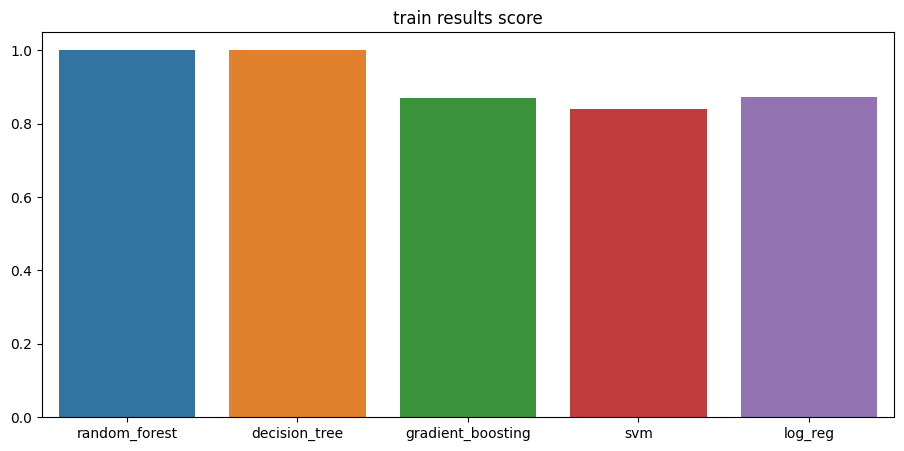

In [30]:
graph = sns.barplot(x=classif_name, y=train_results)
graph.set_title('train results score')
plt.show()

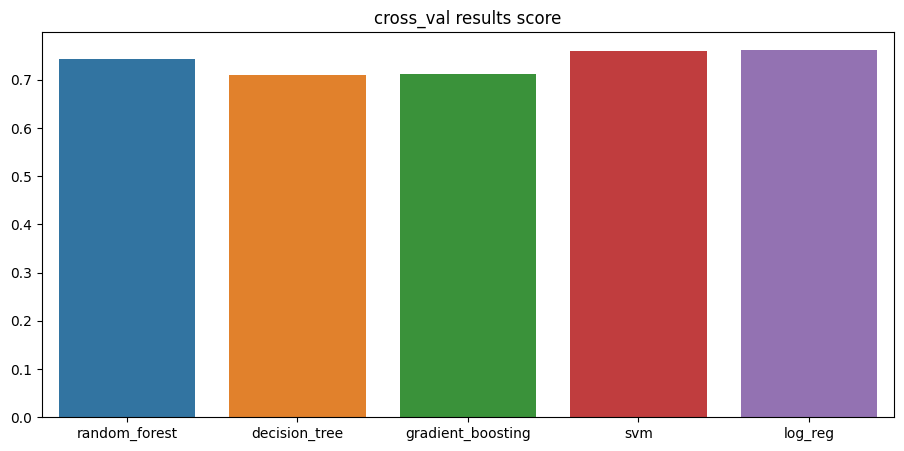

In [31]:
graph = sns.barplot(x=classif_name, y=results)
graph.set_title('cross_val results score')
plt.show()

random forest и decision tree работает примерно олинаково и имеют высокую точногсть но на тренировочных лучше показывает мебя random_forest

на кроссвалидации ситуация немного иная

там работает svm и log_reg лучше всего и имеют высокую точность и log_reg показывает себя тут чуть лучше, что может свидетельствовать о переобучении некоторых наших моделей(svm, logreg)

### Task 3 <a id="task2_3"></a> (0.5 points)

More Gradient Boosting. You will have to take one of the three popular boosting implementations (xgboost, lightgbm, catboost). Select hyperparameters (number of trees, learning rate, depth) on cross-validation and compare with the methods from the previous task.

In [33]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [34]:
# YOUR CODE HERE
from catboost import CatBoostClassifier

cat_atttack = CatBoostClassifier()
result_impl = cross_val_score(cat_atttack, X_train, y_train, scoring='balanced_accuracy').mean()
display(result_impl)

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 0.6597315	total: 104ms	remaining: 20.8s
5:	learn: 0.6522447	total: 117ms	remaining: 19.4s
6:	learn: 0.6462059	total: 128ms	remaining: 18.2s
7:	learn: 0.6408576	total: 140ms	remaining: 17.3s
8:	learn: 0.6338255	total: 151ms	remaining: 16.6s
9:	learn: 0.6280121	total: 163ms	remaining: 16.1s
10:	learn: 0.6229145	total: 175ms	remaining: 15.7s
11:	learn: 0.6178973	total: 191ms	remaining: 15.7s
12:	learn: 0.6138612	total: 205ms	remaining: 15.5s
13:	learn: 0.6091463	total: 223ms	remaining: 15.7s
14:	learn: 0.6048486	total: 233ms	remaining: 15.3s
15:	learn: 0.6005983	total: 247ms	remaining: 15.2s
16:	learn: 0.5977912	total: 259ms	remaining: 15s
17:	learn: 0.5926061	total: 273ms	remaining: 14.9s
18:	learn: 0.5886538	total: 287ms	remaining: 14.8s
19:	learn: 0.5840315	total: 300ms	remaining: 14.7s
20:	learn: 0.5799287	total: 311ms	remaining: 14.5s
21:	learn: 0.5758850	total: 327ms	remaining: 14.5s
22:	learn: 0.5719697	t

0.7147949611364245

Схожая точность с градиентным бустингом из нашей любимой sklearn
(cross_val_results)

### Task 4 <a id="task2_4"></a> (0.7 points)

Now let's train more fancy ensembles:

* Bagging with decision trees as base estimators
* Bagging with gradient boosting (with large amount of trees, >100) as base estimators
* [Voting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Logistic Regression as a final model
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Gradeint Boosting as a final model


If not stated in the task, feel free to tune / choose hyperparameters and base models.

Answer the questions:
* Which model has the best performance?
* Does bagging reduce overfiting of the gradient boosting with large amount of trees?
* What is the difference between voting and staking?

In [35]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [36]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
# делаем что просят
bag_classi_grad_boost = BaggingClassifier(GradientBoostingClassifier(n_estimators=150))
bag_classi_decision_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=1))
stack_classi_logreg = StackingClassifier([
    ('1', LogisticRegression(class_weight='balanced')),
    ('2', LogisticRegression(class_weight='balanced')),
    ('3', LogisticRegression(class_weight='balanced')),
    ('4', LogisticRegression(class_weight='balanced'))
], final_estimator=LogisticRegression())
stack_classi_grboost = StackingClassifier([
    ('1', LogisticRegression(class_weight='balanced')),
    ('2', LogisticRegression(class_weight='balanced')),
    ('3', LogisticRegression(class_weight='balanced')),
    ('4', LogisticRegression(class_weight='balanced'))
], final_estimator=GradientBoostingClassifier())
vote_classi = VotingClassifier([
    ('1', LogisticRegression(class_weight='balanced')),
    ('2', LogisticRegression(class_weight='balanced')),
    ('3', LogisticRegression(class_weight='balanced')),
    ('4', LogisticRegression(class_weight='balanced'))
])

classifie = [bag_classi_grad_boost, bag_classi_decision_tree,
             stack_classi_logreg, stack_classi_grboost, vote_classi]

In [40]:
# теперь вывдем матрицы конфуз для каждоц моедли
names = ['Bagging with decision trees as base estimators',
         'Bagging with gradient boosting as base estimators',
         'Voting classifier', 'Stacking Classifier with Logistic Regression as a final mode',
         'Stacking Classifier with Gradeint Boosting as a final model']
# про названия не забудем
for name, classie in zip(names, classifie):
    display(name)
    display(cross_val_score(classie, X_train, y_train, scoring='balanced_accuracy').mean())
    #classie.fit(X_train, y_train)
    #sns.heatmap(confusion_matrix(y_test, classie.predict(X_test)), annot=True, fmt='.0f')

'Bagging with decision trees as base estimators'

0.7122844635039758

'Bagging with gradient boosting as base estimators'

0.6997141070311802

'Voting classifier'

0.7544447422496203

'Stacking Classifier with Logistic Regression as a final mode'

0.7240775484677924

'Stacking Classifier with Gradeint Boosting as a final model'

0.7607343875636559

<Axes: >

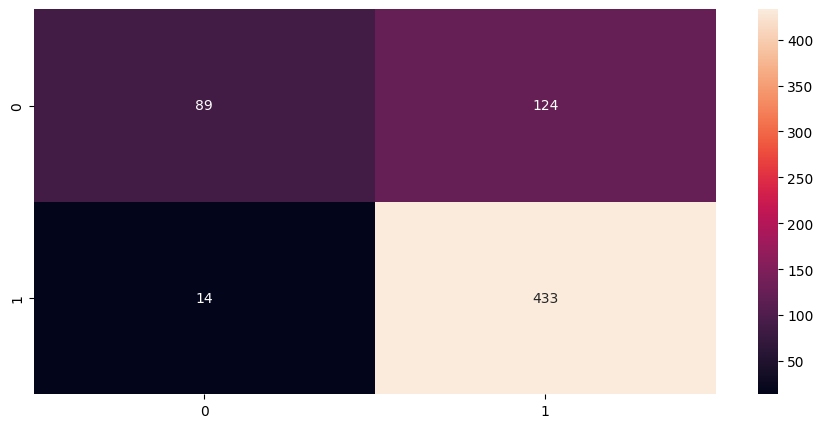

In [39]:
classifie[0].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[0].predict(X_test)), annot=True, fmt='.0f')

<Axes: >

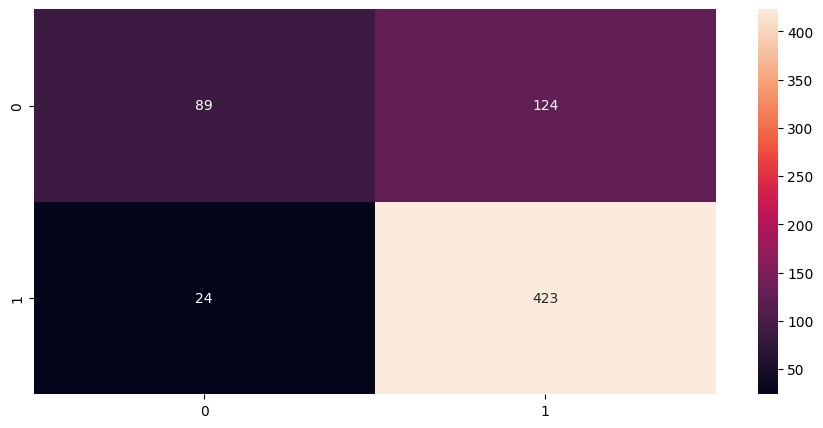

In [41]:
classifie[1].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[1].predict(X_test)), annot=True, fmt='.0f')

<Axes: >

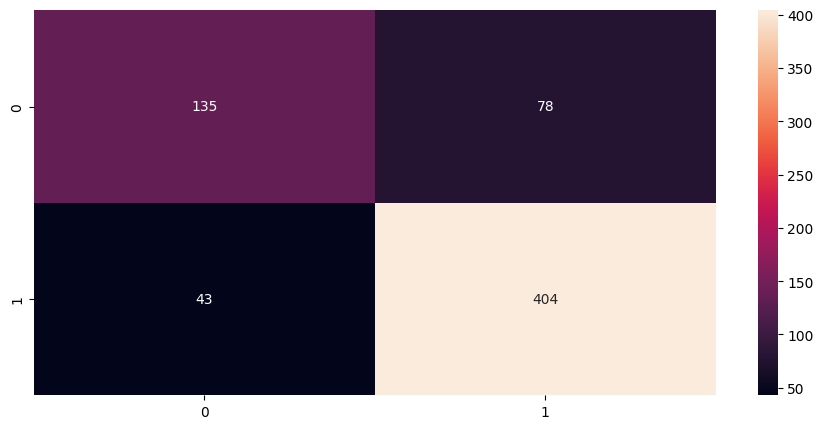

In [42]:
classifie[2].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[2].predict(X_test)), annot=True, fmt='.0f')

<Axes: >

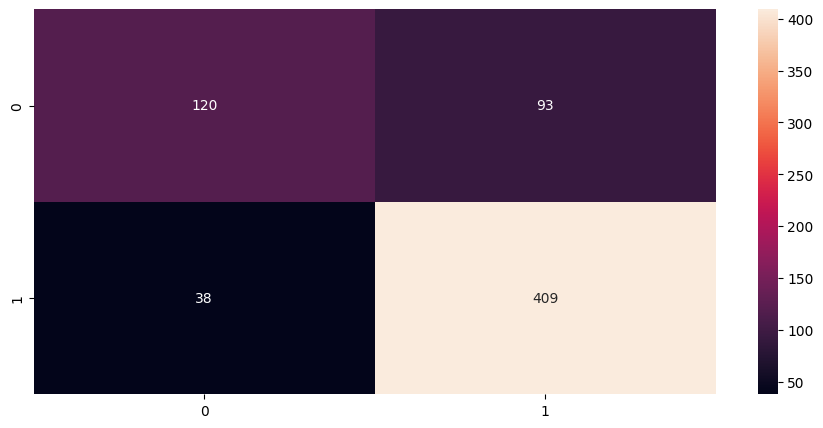

In [43]:
classifie[3].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[3].predict(X_test)), annot=True, fmt='.0f')

<Axes: >

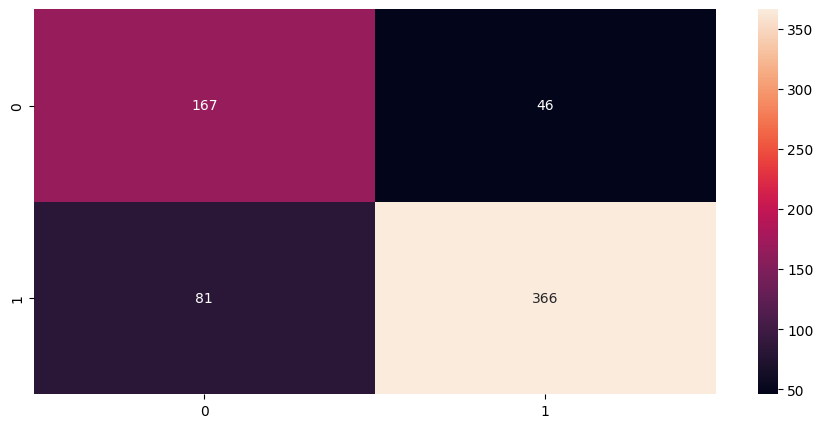

In [44]:
classifie[4].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[4].predict(X_test)), annot=True, fmt='.0f')

-Лучший оказался voting

-При подборе правильных параметров основанные на деревьях модели не ошибаются почти и работают четко
Исходя из полученных результатоов работы, можно увиелть как раз, что градиентный бустинг с большим числом деревьев помогает избежать переобучения и улучшить обобщающие характеристики тренируемой модели, это как раз и видно тут.

-В stacking используем результат предсказаний обученной на predict других базовых моделей ещк одной нашей модели, в voting же мы используеи результат как самый популярный ответ



### Task 5 <a id="task2_5"></a> (0.1 points)

Report the test score for the best model, that you were able to train.

0.7292832879166824

0.8521536670547147

<Axes: >

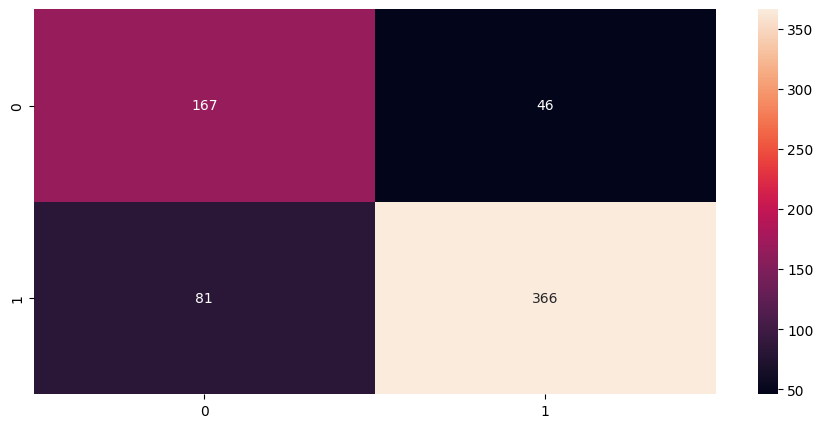

In [48]:
# YOUR CODE HERE
display(cross_val_score(classifie[4], X_test, y_test, scoring='balanced_accuracy').mean())
display(f1_score(y_test, classifie[4].predict(X_test), average='binary'))
classifie[4].fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, classifie[4].predict(X_test)), annot=True, fmt='.0f')

<Axes: >

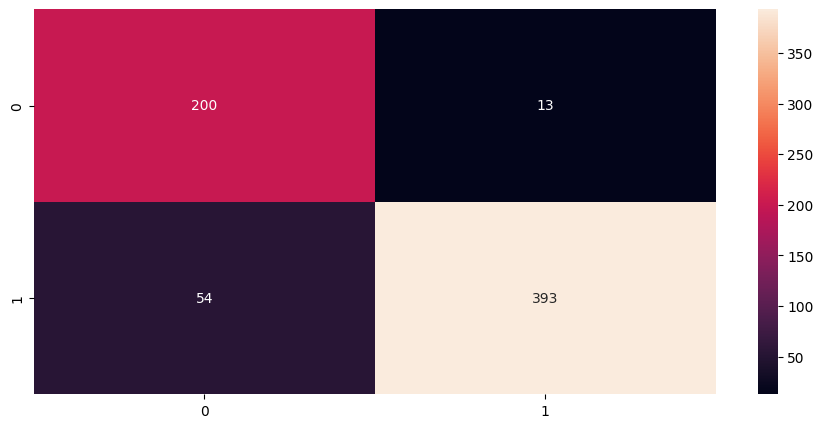

In [49]:
classifie[4].fit(X_test, y_test)
sns.heatmap(confusion_matrix(y_test, classifie[4].predict(X_test)), annot=True, fmt='.0f')